In [1]:
import tensorflow as tf
import mlflow
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
import pandas as pd
import logging
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, MaxPooling2D,Flatten,Dropout,Dense, Lambda
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
# #download the dataset
# mnist = tf.keras.datasets.mnist
# #import data from datasets

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# #converting values to 0<val<1
# X_train, X_test = X_train / 255.0, X_test / 255.0
# #if we dont normalize, it produces a bias

# ##WHAT is mnist dataset??
# #28x28 pixel images 

In [3]:
from numpy import save, load

In [4]:
# save('Inputdata/X_train.npy', X_train)
# save('Inputdata/y_train.npy', y_train)
# save('Inputdata/X_test.npy', X_test)
# save('Inputdata/y_test.npy', y_test)

In [5]:
X_train = load('Inputdata/X_train.npy')
y_train = load('Inputdata/y_train.npy')
X_test = load('Inputdata/X_test.npy')
y_test = load('Inputdata/y_test.npy')

In [6]:
# Reshape X_train to (60000, 784) and X_test to (10000, 784)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [7]:
# Convert target (y_train and y_test) into one-hot
from tensorflow.keras.utils import to_categorical
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

In [8]:
# X_train.shape
y_train.shape
# X_test.shape
# y_test.shape

(60000, 10)

In [9]:
input_data = {'X_train':'Inputdata/X_train.npy','y_train':'Inputdata/y_train.npy','X_test':'Inputdata/X_test.npy','y_test':'Inputdata/y_test.npy'}

In [10]:
#plt.imshow(X_test[8])

In [11]:
# create eval pd.df 
targets = np.where(y_test == np.amax(y_test))[1]

# targets

df = pd.DataFrame(X_test)
df['target'] = targets

In [12]:
run_params={'loss':'categorical_crossentropy','optimizer':'adam','epochs':20}

# loss: poisson, kl_divergence, mean_squared_error, sparse_categorical_crossentropy
# optimizer: adam, Adadelta, SGD
# epoch: 3, 5, 7, 12

In [13]:
def training_basic_classifier(X_train,y_train,run_params):
    ##Build the machine learning model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])  
    
#     loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#     loss_fn(y_train[:1], predictions).numpy()
    
    ##Use the `Model.fit` method to adjust your model parameters and minimize the loss: 
    model.compile(optimizer=run_params['optimizer'],
              loss=run_params['loss'],
              metrics=['accuracy','mse','mae'])
    history=model.fit(X_train,y_train, batch_size=50,epochs=run_params['epochs'], validation_split=0.2)
    model.add(Lambda(lambda x: K.cast(K.argmax(x), dtype='float32'), name='y_pred'))
    return  history, model

##WHAT is loss function?

In [14]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [15]:
def get_metrics(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label = 'val')
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('loss.png')
    plt.clf()
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('Accuracy.png')
    plt.clf()
    
    plt.plot(history.history['mse'], label='train')
    plt.plot(history.history['val_mse'], label='val')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('Mean Squared Error.png')
    plt.clf()
    
    plt.plot(history.history['mae'], label='train')
    plt.plot(history.history['val_mae'], label='val')
    plt.ylabel('Mean Absolute error')
    plt.xlabel('Epochs')
    plt.legend()
    #plt.show()
    plt.savefig('Mean Absolute error.png')
    return {'loss':history.history['loss'],'val_loss':history.history['val_loss'],'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy'],
            'mse':history.history['mse'],'val_mse':history.history['val_mse'],'mae':history.history['mae'],'val_mae':history.history['val_mae']}
    

In [16]:
history, model = training_basic_classifier(X_train,y_train,run_params)

Epoch 1/20
960/960 [==============================] - 4s 4ms/step - loss: 0.3625 - accuracy: 0.8945 - mse: 0.0162 - mae: 0.0381 - val_loss: 0.1709 - val_accuracy: 0.9524 - val_mse: 0.0074 - val_mae: 0.0176
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 0.1730 - accuracy: 0.9494 - mse: 0.0079 - mae: 0.0184 - val_loss: 0.1258 - val_accuracy: 0.9640 - val_mse: 0.0055 - val_mae: 0.0126
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.1293 - accuracy: 0.9622 - mse: 0.0059 - mae: 0.0138 - val_loss: 0.1136 - val_accuracy: 0.9655 - val_mse: 0.0052 - val_mae: 0.0112
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 0.1031 - accuracy: 0.9694 - mse: 0.0048 - mae: 0.0113 - val_loss: 0.0996 - val_accuracy: 0.9693 - val_mse: 0.0046 - val_mae: 0.0095
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 0.0883 - accuracy: 0.9734 - mse: 0.0042 - mae: 0.0096 - val_loss: 0.0905 - val_accuracy: 0.9739 - val_

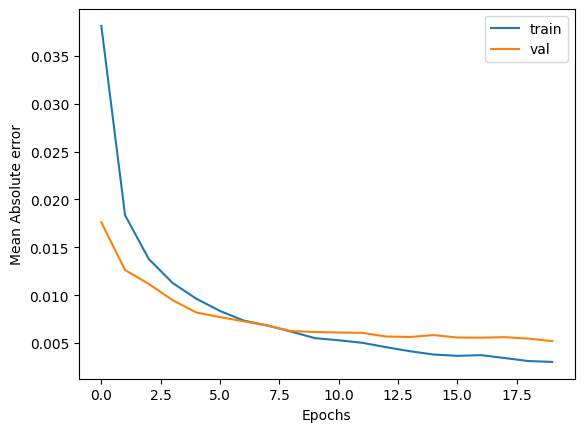

In [17]:
run_metrics = get_metrics(history)

In [18]:
# import numpy as np
# y_pred = predict_on_test_data(model,X_test)
# #print(y_pred)
# y_=[]
# for i in y_pred:
#     p = np.argmax(i)
#     y_.append(p)

    
# for i in y_:
#     print(i)
#     plt.imshow(X_test[i])    
#     print("#"*10)
run_metrics

{'loss': [0.3624951243400574,
  0.1729845404624939,
  0.12926150858402252,
  0.103070467710495,
  0.08828146010637283,
  0.07676457613706589,
  0.06549254059791565,
  0.060413893312215805,
  0.05418788641691208,
  0.04861578717827797,
  0.04604613780975342,
  0.04343978315591812,
  0.03913237154483795,
  0.034982576966285706,
  0.032092273235321045,
  0.03061605803668499,
  0.031806837767362595,
  0.02967389114201069,
  0.026654718443751335,
  0.025021031498908997],
 'val_loss': [0.17088869214057922,
  0.1258254498243332,
  0.11356128752231598,
  0.09957670420408249,
  0.09051129966974258,
  0.08622577786445618,
  0.08483369648456573,
  0.07999100536108017,
  0.08069252222776413,
  0.08134099096059799,
  0.08047772198915482,
  0.08578387647867203,
  0.08373171836137772,
  0.08603788167238235,
  0.08681710809469223,
  0.08840115368366241,
  0.08599305897951126,
  0.0929129347205162,
  0.09310782700777054,
  0.08807586878538132],
 'accuracy': [0.8944583535194397,
  0.9494166374206543,
  

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 y_pred (Lambda)             (None,)                   0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
###MLFLOW PART

experiment_name='tensorflowExperiment'
# run_name='trainingRun'
run_name='evaluationRun'
mae_path='Mean Absolute error.png'
mse_path='Mean Squared Error.png'
loss_path='loss.png'
accuracy_path='Accuracy.png'
input_path='Inputdata'

In [21]:
# def model_evaluation(model,df,experiment_name,run_name,model_info):
#     logging.getLogger("mlflow").setLevel(logging.DEBUG)
#     #mlflow evaluation
#     mlflow.set_tracking_uri("http://localhost:5000")
#     mlflow.set_experiment(experiment_name)
    
#     with mlflow.start_run(run_name=run_name) as run:
#         #model_info = mlflow.tensorflow.log_model(model, "model")
#         result = mlflow.evaluate(
#            model_info.model_uri,
#            df,
#            targets="target",
#            model_type="classifier",
#            #dataset_name="adult",
#             #evaluator_config={'explainability_algorithm':'',},
#            evaluators=["default"],
#         )
        
#     return result

In [24]:
def evaluationRun(experiment_name,run_name, run_metrics,model,df, input_path = None ,mae_path = None, mse_path = None,loss_path = None,
                      accuracy_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, str(run_params[param]))
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric][-1])#choosing the last epoc value for each metric
            
        model_info=mlflow.tensorflow.log_model(model, "model")
        
        if not mae_path == None:
            mlflow.log_artifact(mae_path, 'Mean Absolute Error')
            
        if not mse_path == None:
            mlflow.log_artifact(mse_path, "Mean Square Error")
            
        if not loss_path == None:
            mlflow.log_artifact(loss_path, "Loss")
            
        if not accuracy_path == None:
            mlflow.log_artifact(accuracy_path, "Accuracy")
        if not input_path == None:
            mlflow.log_artifact(input_path)
#         mlflow.set_tag("tag1", "Random Forest")
#         mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        result = mlflow.evaluate(
           model_info.model_uri,
           df,
           targets="target",
           model_type="classifier",
           #dataset_name="adult",
            #evaluator_config={'explainability_algorithm':'',},
           evaluators=["default"],
        )  
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))
    return result

In [25]:
result = evaluationRun(experiment_name=experiment_name,run_metrics=get_metrics(history),run_name=run_name,model=model,df=df,mae_path=mae_path,mse_path=mse_path,loss_path=loss_path,accuracy_path=accuracy_path,run_params=run_params,input_path=input_path)

2023/01/25 12:03:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpfz0rcdyh\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpfz0rcdyh\model\data\model\assets
2023/01/25 12:03:55 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\Admin\AppData\Local\Temp\tmpfz0rcdyh\model, flavor: tensorflow), fall back to return ['tensorflow==2.11.0']. Set logging level to DEBUG to see the full traceback.
C:\Users\Admin\miniconda3\envs\modelenv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
C:\Users\Admin\miniconda3\envs\modelenv\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
2023/01/25 12:03:58 INFO mlflow.models.evaluation.base: Evaluating the model wi

313/313 [==============================] - 1s 2ms/step


2023/01/25 12:03:59 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as multiclass dataset, number of classes is inferred as 10
2023/01/25 12:04:05 INFO mlflow.models.evaluation.default_evaluator: Shap explainer Permutation is used.
2023/01/25 12:04:05 WARNING mlflow.models.evaluation.default_evaluator: Shap evaluation failed. Reason: ValueError('max_evals=500 is too low for the Permutation explainer, it must be at least 2 * num_features + 1 = 1029!'). Set logging level to DEBUG to see the full traceback.


Run - evaluationRun is logged to Experiment - tensorflowExperiment


<Figure size 640x480 with 0 Axes>

In [26]:
# #Evaluation run
# run_name='evaluationRun'
# result = model_evaluation(model,df,experiment_name,run_name,model_info)


In [ ]:
print(result.metrics)

In [ ]:
print(result.artifacts)

In [ ]:
y_pred=predict_on_test_data(model,X_test)

In [ ]:
y_pred

In [ ]:
import numpy as np
# ytest= y_test
# y_test=[]
# for i in ytest:
#     y_test.append(i)
    

# print(y_test)
# print(y_pred)
y_=[]
for i in y_pred:
    p = np.argmax(i)
    y_.append(p)
    
# print(len(y_test))
# #print(shape(y_test))
# print(len(y_pred))  
#wrong=0
indicesplus=[]
for i in range(len(y_pred)):
    if y_test[i]!=y_[i]:
        lol=[]
        lol.append(i)
        lol.append(y_test[i])
        lol.append(y_[i])
#         print(y_test[i])
#         print(y_[i])
#         print("&&& "*10)
        indicesplus.append(lol)


print("wrong answers:",indicesplus)

#plt.imshow(X_test[8])

In [ ]:
# single = X_test[74]
# print(X_test.shape)

In [ ]:
len(indicesplus)/10000 - 1

In [ ]:
# #predict_on_test_data(model,single)
# model.predict(single)